<a href="https://colab.research.google.com/github/dpnolan/AI/blob/master/Chollet_2e_Chap3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##3.5.4 A linear classifier in pure TensorFlow

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.4.1'

In [2]:
num_samples_per_class=1000
negative_samples=np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class
    )
positive_samples=np.random.multivariate_normal(
    mean=[3,0], cov=[[1, 0.5],[0.5,1]], size=num_samples_per_class
)


In [3]:
inputs=np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [4]:
targets=np.vstack((np.zeros((num_samples_per_class,1),dtype='float32'),
                  np.ones((num_samples_per_class,1),dtype='float32')))

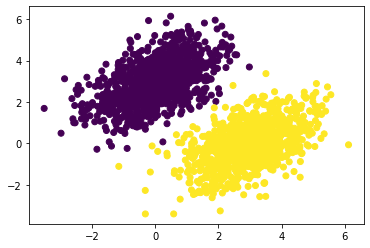

In [5]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:,0],inputs[:,1], c=targets[:,0])

In [6]:
input_dim=2
output_dim=1
W=tf.Variable(initial_value=tf.random.uniform(shape=(input_dim,output_dim)))
b=tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [7]:
def model(inputs):
  return tf.matmul(inputs, W) + b

In [8]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets-predictions)
  return tf.reduce_mean(per_sample_losses)


In [9]:
learning_rate=0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions=model(inputs)
    loss=square_loss(predictions, targets)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W,b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate) 
  return loss


In [10]:
for step in range(30):
  loss = training_step(inputs, targets)
  print('Loss at step %d: %.4f' % (step,loss))

Loss at step 0: 2.7534
Loss at step 1: 0.4297
Loss at step 2: 0.1612
Loss at step 3: 0.1204
Loss at step 4: 0.1083
Loss at step 5: 0.1004
Loss at step 6: 0.0936
Loss at step 7: 0.0875
Loss at step 8: 0.0819
Loss at step 9: 0.0768
Loss at step 10: 0.0722
Loss at step 11: 0.0679
Loss at step 12: 0.0641
Loss at step 13: 0.0606
Loss at step 14: 0.0574
Loss at step 15: 0.0545
Loss at step 16: 0.0519
Loss at step 17: 0.0495
Loss at step 18: 0.0473
Loss at step 19: 0.0453
Loss at step 20: 0.0435
Loss at step 21: 0.0418
Loss at step 22: 0.0403
Loss at step 23: 0.0390
Loss at step 24: 0.0377
Loss at step 25: 0.0366
Loss at step 26: 0.0355
Loss at step 27: 0.0346
Loss at step 28: 0.0337
Loss at step 29: 0.0330


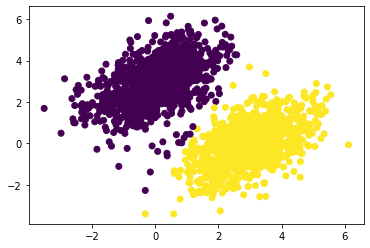

In [11]:
predictions = model(inputs)
plt.scatter(inputs[:,0],inputs[:,1],c=predictions[:,0]>0.5)
plt.show()

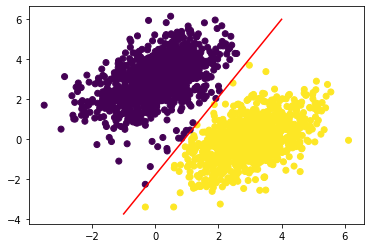

In [12]:
x=np.linspace(-1,4,100)
y= -W[0] / W[1]*x + (0.5-b) / W[1]
plt.plot(x, y, '-r') 
plt.scatter(inputs[:,0],inputs[:,1],c=predictions[:,0]>0.5)

The Base **Layer** class in Keras

In [13]:
class SimpleDense(keras.layers.Layer):

  def  __init__(self, units, activation=None):
    super(SimpleDense, self).__init__()
    self.units=units
    self.activation=activation
  
  def build(self, input_shape):
    input_dim=input_shape[-1]
    self.W = self.add_weight(shape=(input_dim, self.units),initializer='random_normal')
    self.b = self.add_weight(shape=(self.units,),initializer='zeros')

  def call(self, inputs):
    y = tf.matmul(inputs, self.W) + self.b
    if self.activation is not None:
      y=self.activation(y)
    return y

In [14]:
# Example layer 
my_dense=SimpleDense(units=32, activation=tf.nn.relu)
input_tensor=tf.ones(shape=(2,784))
output_tensor=my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


In [15]:
#automatic shape inference
from tensorflow.keras import layers
layer=layers.Dense(32, activation='relu')

In [16]:
from tensorflow.keras import models
model=models.Sequential([layers.Dense(32,activation='relu'),layers.Dense(32)])

In [17]:
model=keras.Sequential([
                        SimpleDense(32, activation='relu'),
                        SimpleDense(64, activation='relu'),
                        SimpleDense(32, activation='relu'),
                        SimpleDense(10, activation='softmax')            
])

In [18]:
model

In [19]:
dir(model)

['_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_variable_with_custom_getter',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_base_model_initialized',
 '_build_graph_network_for_inferred_shape',
 '_build_input_shape',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_arg_defaults',
 '_call_fn_arg_positions',
 '_call_fn_args',
 '_call_full_argspec',
 '_callable_losses',
 '_cast_single_input',
 '_check_call_args',
 '_checkpoint_dependencies',
 '_clear_los

In [21]:
model=keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['accuracy']
              )

In [22]:
#OR!
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()]
)

In [23]:
history=model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 0s 1ms/step - loss: 7.6818 - binary_accuracy: 0.0138
Epoch 2/5
16/16 [==============================] - 0s 1ms/step - loss: 7.3806 - binary_accuracy: 0.0135
Epoch 3/5
16/16 [==============================] - 0s 1ms/step - loss: 7.1323 - binary_accuracy: 0.0134
Epoch 4/5
16/16 [==============================] - 0s 1ms/step - loss: 6.7579 - binary_accuracy: 0.0127
Epoch 5/5
16/16 [==============================] - 0s 1ms/step - loss: 6.4829 - binary_accuracy: 0.0125


In [24]:
model=keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()]
              )
indices_permutation=np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples =int(0.3 * len(inputs) )
val_inputs = shuffled_inputs[-num_validation_samples:]
val_targets = shuffled_targets[-num_validation_samples:]
training_inputs = shuffled_inputs[:num_validation_samples]
training_targets= shuffled_targets[:num_validation_samples]

model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs,val_targets)
)

Epoch 1/5
38/38 [==============================] - 1s 6ms/step - loss: 0.4262 - binary_accuracy: 0.9810 - val_loss: 0.0279 - val_binary_accuracy: 0.9983
Epoch 2/5
38/38 [==============================] - 0s 3ms/step - loss: 0.0619 - binary_accuracy: 0.9593 - val_loss: 0.0530 - val_binary_accuracy: 0.9800
Epoch 3/5
38/38 [==============================] - 0s 3ms/step - loss: 0.0614 - binary_accuracy: 0.9886 - val_loss: 0.0300 - val_binary_accuracy: 0.9967
Epoch 4/5
38/38 [==============================] - 0s 2ms/step - loss: 0.0754 - binary_accuracy: 0.9470 - val_loss: 0.0495 - val_binary_accuracy: 0.9950
Epoch 5/5
38/38 [==============================] - 0s 2ms/step - loss: 0.0610 - binary_accuracy: 0.9596 - val_loss: 0.0838 - val_binary_accuracy: 0.9733


In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [26]:
loss_and_metrics=model.evaluate(val_inputs, val_targets, batch_size=128)

5/5 [==============================] - 0s 3ms/step - loss: 0.0838 - binary_accuracy: 0.9733


In [27]:
predictions=model(val_inputs)

In [28]:
predictions = model.predict(val_inputs, batch_size=128)

In [29]:
print(predictions[:10])

[[-0.1673153 ]
 [ 0.8677906 ]
 [ 0.6858373 ]
 [-0.40749604]
 [ 0.5946926 ]
 [-0.34506845]
 [ 0.4060782 ]
 [ 0.12325704]
 [ 0.43738103]
 [ 0.5508129 ]]
